In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(img_path,img_size):
    img = cv2.imread(img_path) # Read image
    img = cv2.resize(img(img_size,img_size)) # Sqaure shape
    img = img/255.0 # Normalize
    return img

In [3]:
def load_data (folder_path,categories,img_size):
    data=[]
    labels=[]
    
    for category in categories:
        path = os.path.join (folder_path,category)
        class_label = categories.index (category)
        
        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            try:
                img = preprocess_image(img_path,img_size)
                data.append(img)
                labels.append(class_label)
            except Exception as e:
                print (f"Error loading image {img_name}:{e}")
    
    return np.array(data),np.array(labels)

In [27]:
img_size = 150
categories = ['OSCC','normal']
train_dir = "./Downloads/OralCancer/train/"
test_dir ="./Downloads/OralCancer/test/"
val_dir = "./Downloads/OralCancer/val/"

In [29]:
X_train,y_train = load_data(train_dir,categories,img_size)
X_test,y_test = load_data(test_dir,categories,img_size)
X_val,y_val = load_data(val_dir,categories,img_size)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(128,activation = 'relu'))

In [35]:
model.add(Dropout(0.5))

In [36]:
model.add(Dense(1,activation = 'sigmoid'))

In [37]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    batch_size=32 
)

Epoch 1/20
155/155 [==============================] - 68s 427ms/step - loss: 0.7055 - accuracy: 0.5265 - val_loss: 0.7517 - val_accuracy: 0.3667
Epoch 2/20
155/155 [==============================] - 64s 415ms/step - loss: 0.6828 - accuracy: 0.5279 - val_loss: 0.6789 - val_accuracy: 0.7667
Epoch 3/20
155/155 [==============================] - 61s 396ms/step - loss: 0.6785 - accuracy: 0.5445 - val_loss: 0.5262 - val_accuracy: 0.7750
Epoch 4/20
155/155 [==============================] - 65s 420ms/step - loss: 0.6283 - accuracy: 0.6533 - val_loss: 0.5108 - val_accuracy: 0.7917
Epoch 5/20
155/155 [==============================] - 47s 305ms/step - loss: 0.6132 - accuracy: 0.6688 - val_loss: 0.5147 - val_accuracy: 0.7500
Epoch 6/20
155/155 [==============================] - 47s 302ms/step - loss: 0.6080 - accuracy: 0.6678 - val_loss: 0.5152 - val_accuracy: 0.7333
Epoch 7/20
155/155 [==============================] - 46s 297ms/step - loss: 0.5884 - accuracy: 0.6975 - val_loss: 0.4963 - val_ac

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

4/4 [==============================] - 0s 66ms/step - loss: 0.9842 - accuracy: 0.7619
Test accuracy: 76.19%


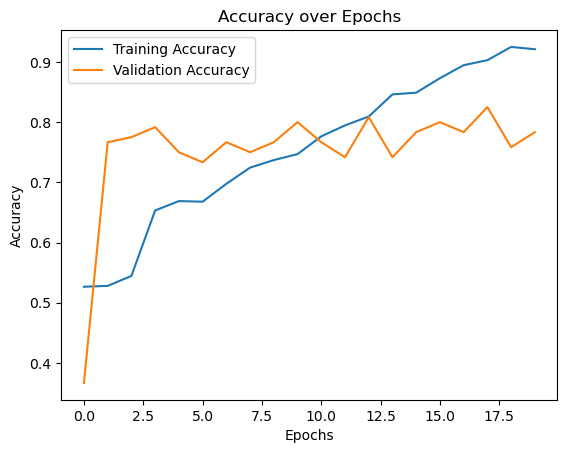

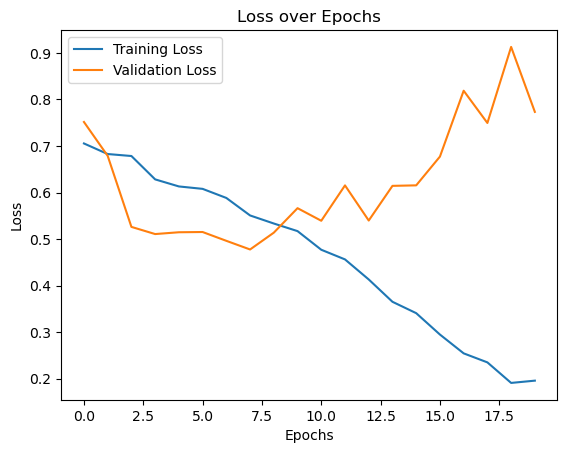

In [40]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()